# Approach 2 <hr/>

### <u>Import libraries and dataset</u>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from warnings import simplefilter

# Ignore the warning statements
simplefilter(action='ignore', category=FutureWarning)

In [4]:
"""
# Import the dataset into the notebook
dataset = pd.read_csv("parkinsons.data", sep=',')
dataset.head(10)
"""

# Import the dataset directly from the provided link
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
dataset = pd.read_csv(url)
dataset.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


### <u>Exploratory Data Analysis (EDA)</u>

In [6]:
# Shape of the dataset
print("Number of Records  : ", dataset.shape[0])
print("Number of Features : ", dataset.shape[1])

Number of Records  :  195
Number of Features :  24


In [7]:
# Fields in the dataset
print(dataset.columns)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [8]:
# 'name' field is dropped, as it serves no purpose in the classification
dataset.drop(['name'], axis=1, inplace=True)

# Type coversion of target variable (8-bit unsigned int)
dataset['status'] = dataset['status'].astype('uint8')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    uint8  
 1

In [9]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### <u>Data Preprocessing</u>

In [11]:
# Checking for the duplicated rows in dataset
print("Number of duplicated records:", dataset.duplicated().sum())

# if there is/are any duplicated rows present, remove it
# dataset = dataset.drop_duplicates(keep='first')

Number of duplicated records: 0


In [12]:
# Checking for missing values in dataset
print("Count missing values in each column:\n")
print(dataset.isna().sum())

Count missing values in each column:

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [13]:
# Unique values of status field
print("Unique status values:", np.unique(dataset.status))

Unique status values: [0 1]


### <u>Target variable.</u> 
Target variable in this dataset is <strong>'status'</strong>. <br>
<strong>status: 1</strong> - the patient is tested positive (PWD - Patient With Parkinson's Disease) <br>
<strong>status: 0</strong> - the patient is tested negative (Healthy person) <br>

<Axes: xlabel='status', ylabel='count'>

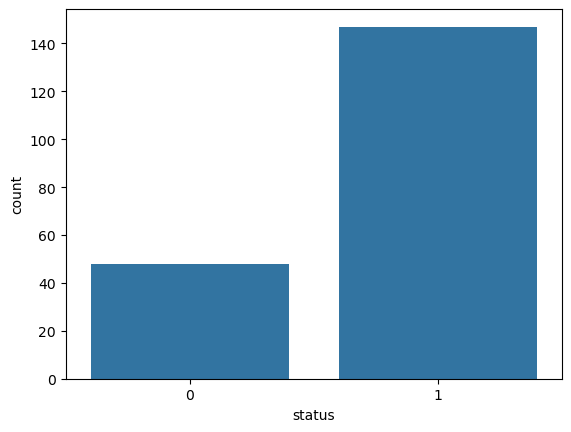

In [15]:
# Balance of Data using a countplot
sns.countplot(x='status', data=dataset)

### <u>NHR (Noise to Harmonics Ratio)</u>
NHR is the amount of noise relative to harmonic (period) components in a  signal. Higher NHR value signifies that the noise is higher that suggests in less clear or more disordered voice. It is often used to evaluate voice quality, particularly in clinical departments, as higher noise levels can indiacte vocal pathologies or breathiness in speech. <br>
### <u>HNR (Harmonics to Noise Ratio)</u>
HNR is the inverse, measuring the ratio of harmonic content to noise in the signal. Higher HNR values suggest a cleaner, more periodic sound, indicating better voice quality. It is frequently used in speech analysis to evaluate clarity, voice quality, or presence of vocal disorders. High HNR typically reflects a healthy vocal production.<br><br>

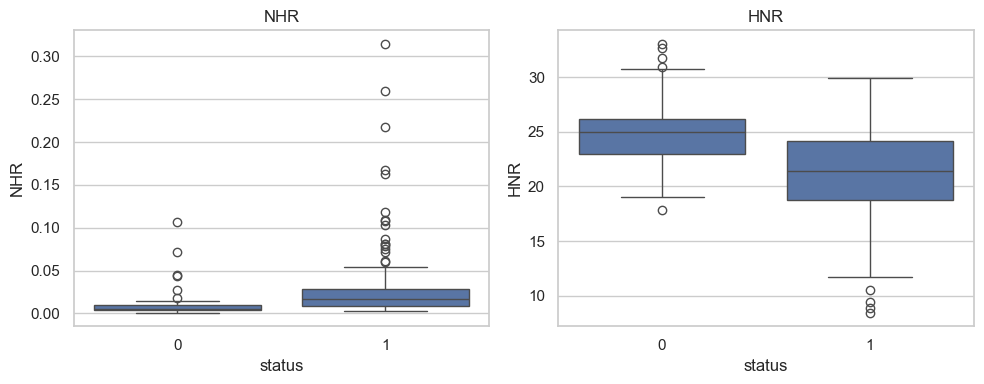

In [17]:
# Boxplot of NHR and HNR

plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")

plt.subplot(1,2,1)
sns.boxplot(x='status',y="NHR",data=dataset)
plt.title("NHR")

plt.subplot(1,2,2)
sns.boxplot(x='status',y="HNR",data=dataset)
plt.title("HNR")

plt.tight_layout()
plt.show()

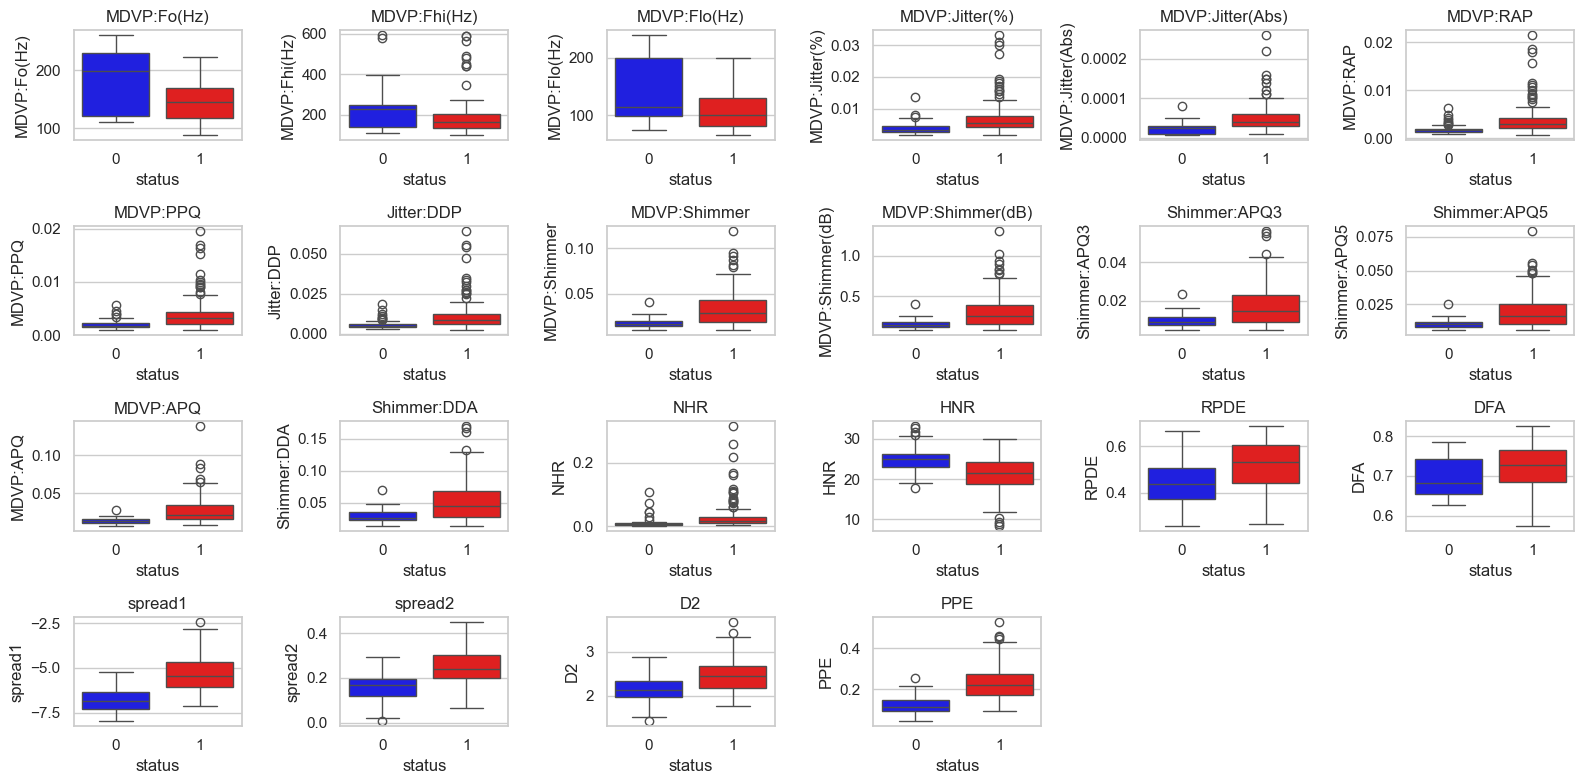

In [18]:
# Boxplot of every feature vs status

i = 0
plt.figure(figsize=(16,8))
sns.set(style='whitegrid')

for attribute in dataset.drop(['status'], axis=1, inplace=False).columns:
  i += 1
  plt.subplot(4,6,i)
  sns.boxplot(x='status', y=attribute, data=dataset, palette={'0':'blue', '1':'red'})
  plt.title(attribute)
    
plt.tight_layout()
plt.show()

In [19]:
# Skewness of the feaures
num_features = dataset.select_dtypes(include='number').columns
skewness = dataset[num_features].skew()
print("Skewness of Numerical Features:\n")
print(skewness)

Skewness of Numerical Features:

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64


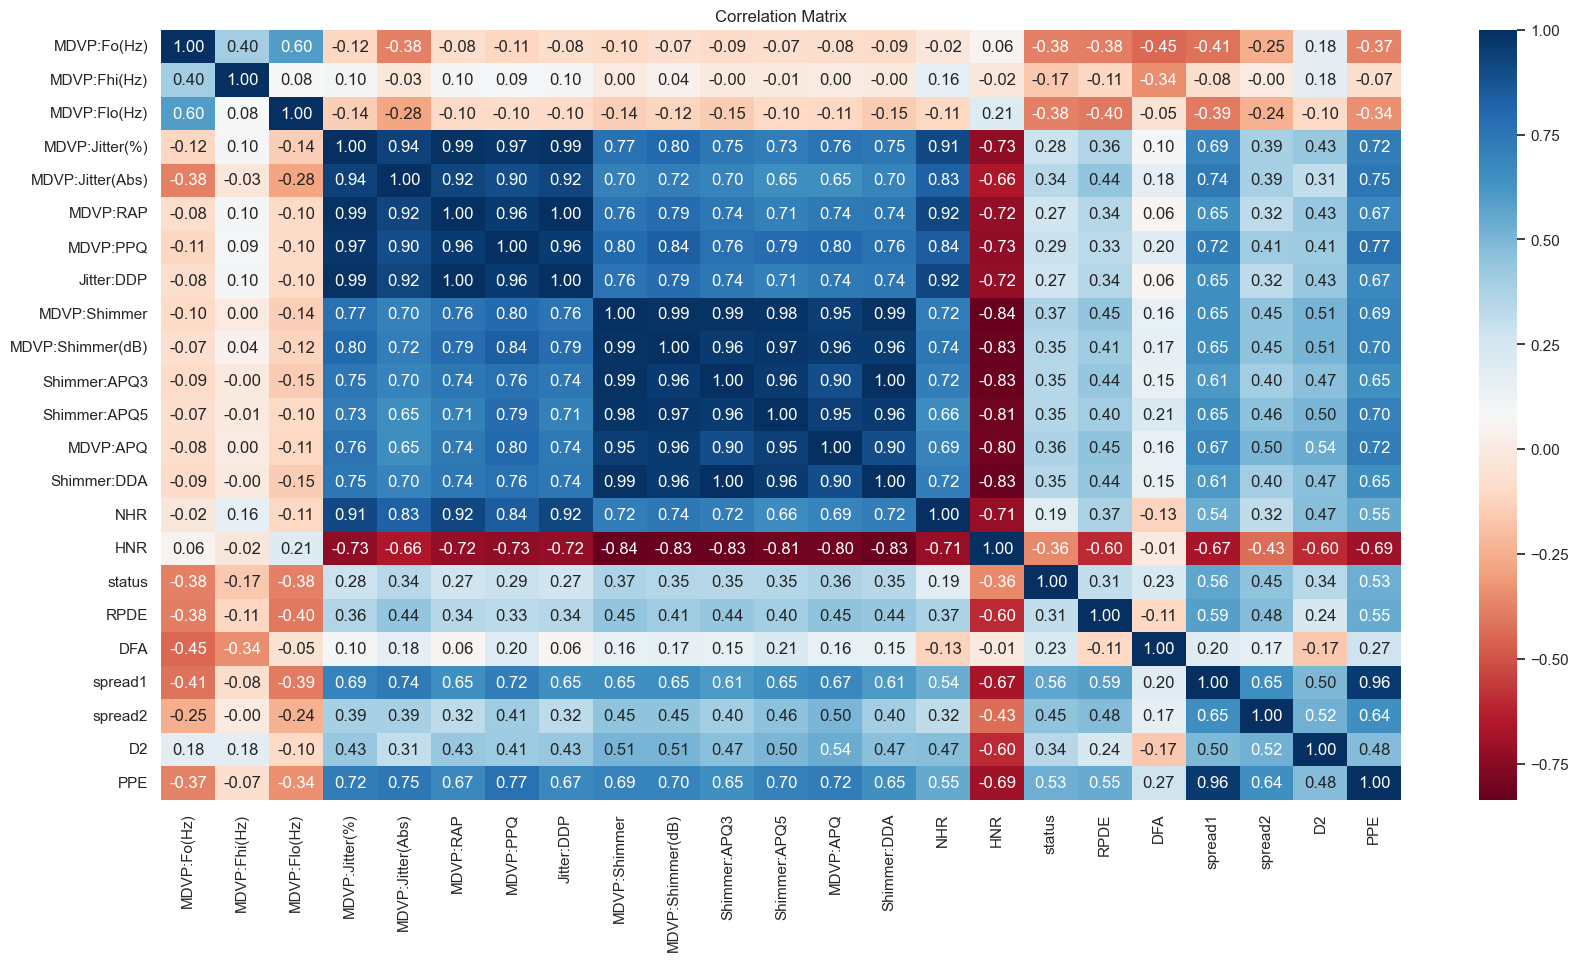

In [20]:
# Correlation matrix of the dataset
correlation_matrix = dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

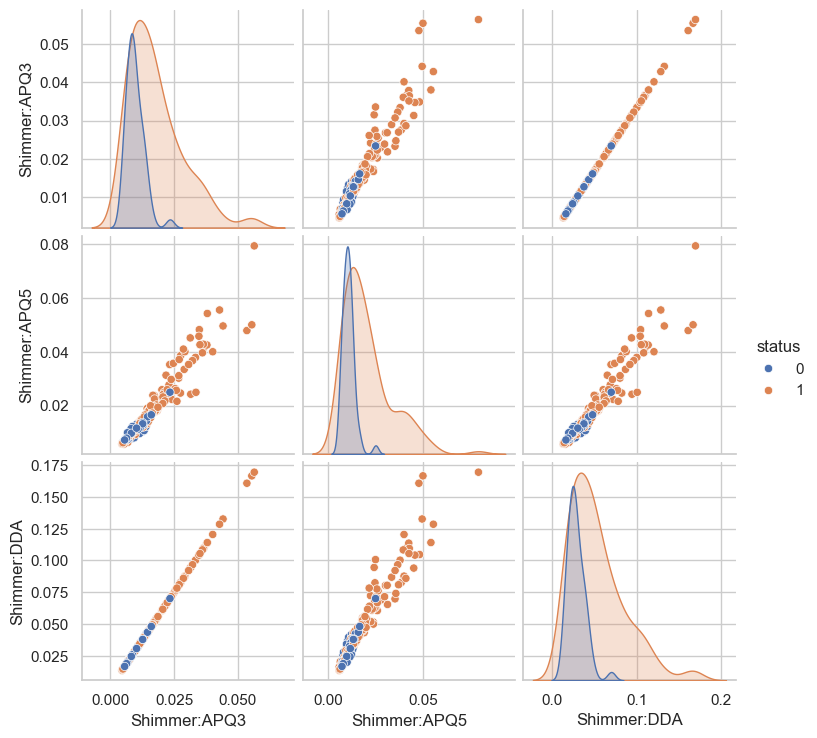

In [21]:
# Pairplot of Shimmer data
sns.pairplot(dataset, hue='status', vars=['Shimmer:APQ3','Shimmer:APQ5','Shimmer:DDA'])

In [22]:
dataset['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

### <u>Methods to evaluate and display metrics</u>

In [24]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC Score']

def evaluateMetrics(cm):
    accuracy = float((cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))
    precision = float(cm[1][1] / (cm[1][1] + cm[0][1]))
    recall = float(cm[1][1] / (cm[1][0] + cm[1][1]))
    f1_score = 2 * ((precision * recall) / (precision + recall))
    return list([accuracy, precision, recall, f1_score])

def displayMetrics(values, auc):
    print(f"{metrics[0]: >10} : {values[0]}")
    print(f"{metrics[1]: >10} : {values[1]}")
    print(f"{metrics[2]: >10} : {values[2]}")
    print(f"{metrics[3]: >10} : {values[3]}")
    print(f"{metrics[4]: >10} : {auc}")

### <u>Split dependent and independent variables</u>

In [26]:
# Splitting dependent and independent fields
X = dataset.drop(['status'], axis=1, inplace=False)
Y = dataset['status']

### <u>Normalization of the dataset using StandardScaler</u>

In [28]:
# Normalizing the dependent variables
scaler = StandardScaler(with_mean=True, with_std=True)
X = scaler.fit_transform(X)

### <u> Applying dimensionality reduction using Principal Component Analysis</u>

In [30]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

In [31]:
X_pca[:10]

array([[ 2.0966143 , -1.55060712, -1.26506987, -0.84000197, -0.7268687 ],
       [ 4.70933096, -1.33459335, -1.05765361, -2.13973928, -1.17790724],
       [ 3.85261522, -1.42622131, -1.82496468, -1.16392   , -1.26555752],
       [ 4.13477146, -1.58191374, -1.38803563, -1.46319303, -1.40564663],
       [ 5.68969044, -1.1503138 , -2.42101718, -1.34479092, -0.84993645],
       [ 3.07627873, -1.61794728, -1.83406796, -0.96858863, -1.4864941 ],
       [-1.98335796, -2.02034717, -0.31289266,  0.2097376 , -0.07531183],
       [-2.36368804, -2.03621244, -0.45102742,  0.20568623,  0.66862722],
       [-0.20560957, -2.51707019,  0.16489611,  0.46282848, -0.50590433],
       [ 0.47920516, -2.60904779, -0.09766476, -0.31227736, -0.91982396]])

In [32]:
component_names = [f"PC{i + 1}" for i in range(5)]
pd.DataFrame(X_pca, columns=component_names).head(5)

,PC1,PC2,PC3,PC4,PC5
0,2.096614,-1.550607,-1.265070,-0.840002,-0.726869
1,4.709331,-1.334593,-1.057654,-2.139739,-1.177907
2,3.852615,-1.426221,-1.824965,-1.163920,-1.265558
3,4.134771,-1.581914,-1.388036,-1.463193,-1.405647
4,5.689690,-1.150314,-2.421017,-1.344791,-0.849936


### <u>Split into train dataset and test dataset</u>

In [34]:
# Splitting the dataset into 75% train data and 25 % test data
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.25, random_state=42)
print(type(X_train), type(Y_train))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


## <br><hr/> Machine Learning Models <hr/>

### 1. <u>Logistic Regression</u>

#### <li>L1 Regularization</li>

In [38]:
lr1_model = LogisticRegression(
    penalty='l1', C=1.0, solver='liblinear', random_state=42
)
lr1_model.fit(X_train, Y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [39]:
lr1_predictions = lr1_model.predict(X_test)
print(classification_report(Y_test, lr1_predictions))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.88      1.00      0.94        38

    accuracy                           0.90        49
   macro avg       0.94      0.77      0.82        49
weighted avg       0.91      0.90      0.89        49



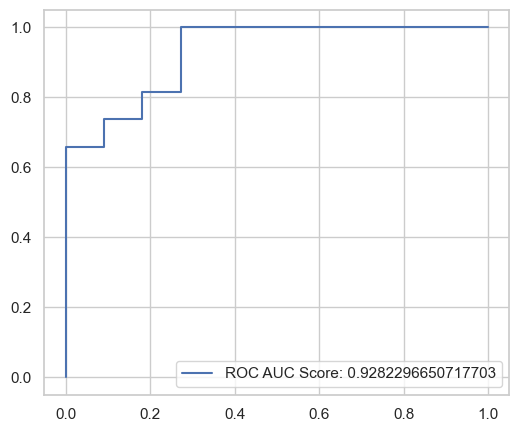

In [40]:
# ROC Curve
lr1_yprob = lr1_model.predict_proba(X_test)[:, 1]
lr1_fpr, lr1_tpr, lr1_threshold = roc_curve(y_true=Y_test, y_score=lr1_yprob)
lr1_auc_value = roc_auc_score(Y_test, lr1_yprob)

plt.figure(figsize=(6, 5))
plt.plot(lr1_fpr, lr1_tpr, label=f"ROC AUC Score: {lr1_auc_value}")
plt.legend(loc=4)
plt.show()

In [41]:
# Accuracy Scores for train and test data
lr1_X_train_pred = lr1_model.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, lr1_X_train_pred))
lr1_X_test_pred = lr1_model.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, lr1_X_test_pred))

Accuracy Score of trained data :  0.8424657534246576
Accuracy Score of test data :  0.8979591836734694


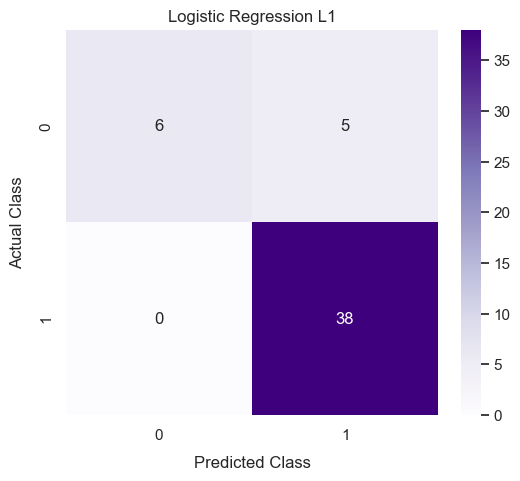

In [42]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
lr1_cm = confusion_matrix(Y_test, lr1_predictions)
sns.heatmap(lr1_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("Logistic Regression L1")
plt.show()

In [43]:
displayMetrics(evaluateMetrics(lr1_cm), lr1_auc_value)

  Accuracy : 0.8979591836734694
 Precision : 0.8837209302325582
    Recall : 1.0
  F1-Score : 0.9382716049382717
 AUC Score : 0.9282296650717703


#### <li>L2 Regularization</li>

In [45]:
lr2_model = LogisticRegression(
    penalty='l2', C=1.0, solver='liblinear', random_state=42
)
lr2_model.fit(X_train, Y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [46]:
lr2_predictions = lr2_model.predict(X_test)
print(classification_report(Y_test, lr2_predictions))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.90      1.00      0.95        38

    accuracy                           0.92        49
   macro avg       0.95      0.82      0.86        49
weighted avg       0.93      0.92      0.91        49



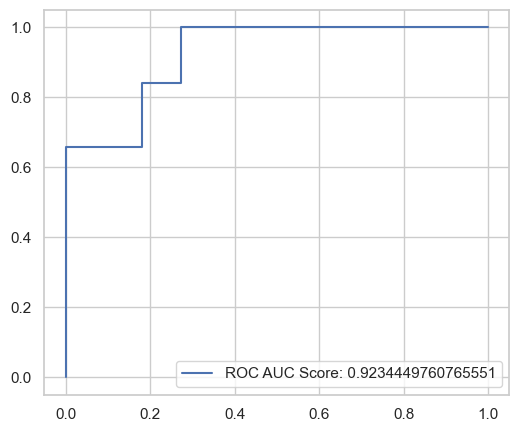

In [47]:
# ROC Curve
lr2_yprob = lr2_model.predict_proba(X_test)[:, 1]
lr2_fpr, lr2_tpr, lr2_threshold = roc_curve(y_true=Y_test, y_score=lr2_yprob)
lr2_auc_value = roc_auc_score(Y_test, lr2_yprob)

plt.figure(figsize=(6, 5))
plt.plot(lr2_fpr, lr2_tpr, label=f"ROC AUC Score: {lr2_auc_value}")
plt.legend(loc=4)
plt.show()

In [48]:
# Accuracy Scores for train and test data
lr2_X_train_pred = lr2_model.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, lr2_X_train_pred))
lr2_X_test_pred = lr2_model.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, lr2_X_test_pred))

Accuracy Score of trained data :  0.8424657534246576
Accuracy Score of test data :  0.9183673469387755


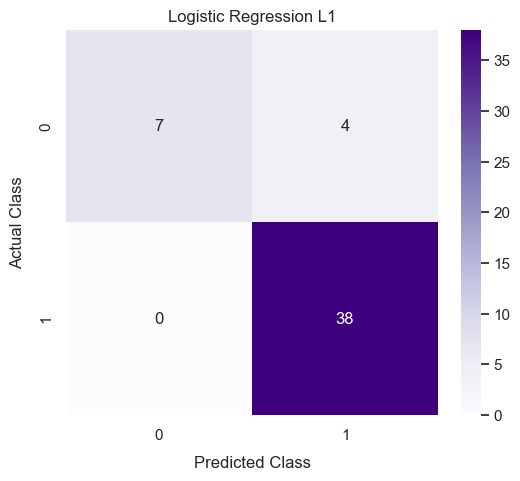

In [49]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
lr2_cm = confusion_matrix(Y_test, lr2_predictions)
sns.heatmap(lr2_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("Logistic Regression L1")
plt.show()

In [50]:
displayMetrics(evaluateMetrics(lr2_cm), lr2_auc_value)

  Accuracy : 0.9183673469387755
 Precision : 0.9047619047619048
    Recall : 1.0
  F1-Score : 0.9500000000000001
 AUC Score : 0.9234449760765551


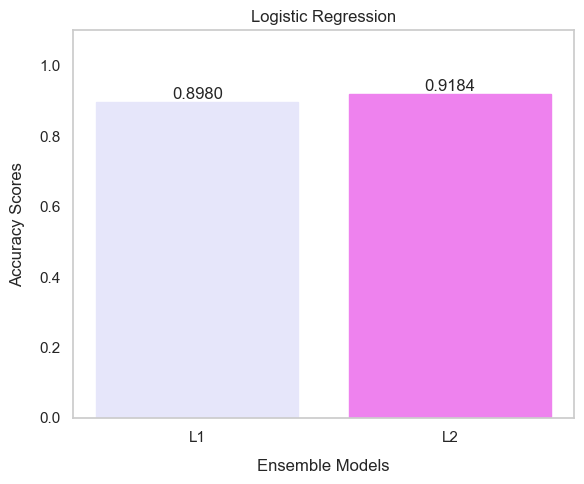

In [51]:
# Comparing both Logistic Regression Models
# Bar Plot of Accuracies

lr_models = ["L1", "L2"]
l1 = list(evaluateMetrics(lr1_cm))
l1.append(lr1_auc_value)
l2 = list(evaluateMetrics(lr2_cm))
l2.append(lr2_auc_value)
lr_accuracies = [l1[0], l2[0]]
# print(lr_accuracies)

plt.figure(figsize=(6, 5))
lr_graph = plt.bar(lr_models, lr_accuracies)
plt.xlabel("Ensemble Models", labelpad=10)
plt.ylabel("Accuracy Scores", labelpad=10)
plt.title("Logistic Regression")
plt.ylim(0, 1.10)
plt.xticks()

for i in range(2):
    plt.text(x=i, y=lr_accuracies[i], s=f"{lr_accuracies[i]:.4f}", ha="center", va="bottom")

lr_graph[0].set_color('lavender')
lr_graph[1].set_color('violet')
plt.tight_layout()
plt.grid(False)
plt.show()

In [52]:
# Table between metrics of both models

lr1_metrics = {metrics[i]: l1[i] for i in range(len(metrics))}
lr2_metrics = {metrics[i]: l2[i] for i in range(len(metrics))}
lr_table = pd.DataFrame({
    'L1 Model' : lr1_metrics, 
    'L2 Model' : lr2_metrics
})
print(lr_table)

           L1 Model  L2 Model
Accuracy   0.897959  0.918367
Precision  0.883721  0.904762
Recall     1.000000  1.000000
F1-Score   0.938272  0.950000
AUC Score  0.928230  0.923445


### 2. <u>Random Forest Classifier</u>

In [54]:
rfc_model = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_leaf=4, 
    min_samples_split=10, max_features='sqrt', bootstrap=True, 
    random_state=42
)
rfc_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [55]:
rfc_predictions = rfc_model.predict(X_test)
print(classification_report(Y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.86      0.55      0.67        11
           1       0.88      0.97      0.93        38

    accuracy                           0.88        49
   macro avg       0.87      0.76      0.80        49
weighted avg       0.88      0.88      0.87        49



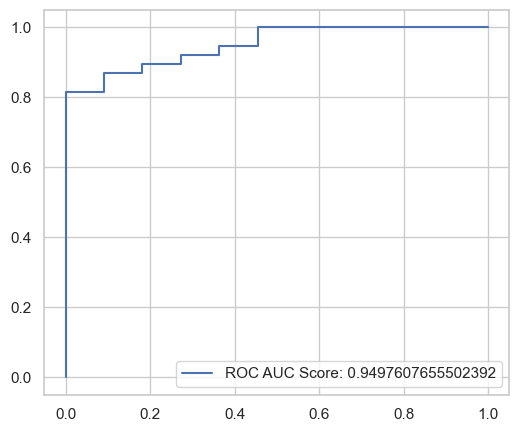

In [56]:
# ROC Curve
rfc_yprob = rfc_model.predict_proba(X_test)[:, 1]
rfc_fpr, rfc_tpr, threshold = roc_curve(Y_test, rfc_yprob)
rfc_auc_value = roc_auc_score(Y_test, rfc_yprob)

plt.figure(figsize=(6, 5))
plt.plot(rfc_fpr, rfc_tpr, label=f"ROC AUC Score: {rfc_auc_value}")
plt.legend(loc=4)
plt.show()

In [57]:
# Accuracy Scores for train and test data
rfc_X_train_pred = rfc_model.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, rfc_X_train_pred))
rfc_X_test_pred = rfc_model.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, rfc_X_test_pred))

Accuracy Score of trained data :  0.9863013698630136
Accuracy Score of test data :  0.8775510204081632


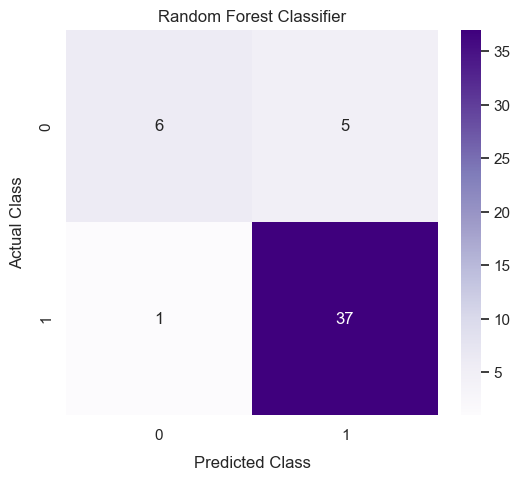

In [58]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
rfc_cm = confusion_matrix(Y_test, rfc_predictions)
sns.heatmap(rfc_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("Random Forest Classifier")
plt.show()

In [59]:
displayMetrics(evaluateMetrics(rfc_cm), rfc_auc_value)

  Accuracy : 0.8775510204081632
 Precision : 0.8809523809523809
    Recall : 0.9736842105263158
  F1-Score : 0.925
 AUC Score : 0.9497607655502392


### 3. <u>Support Vector Machine (SVM)</u>

#### <li>Linear kernel</li>

In [62]:
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [63]:
svm_linear_predictions = svm_linear.predict(X_test)
print(classification_report(Y_test, svm_linear_predictions))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.90      1.00      0.95        38

    accuracy                           0.92        49
   macro avg       0.95      0.82      0.86        49
weighted avg       0.93      0.92      0.91        49



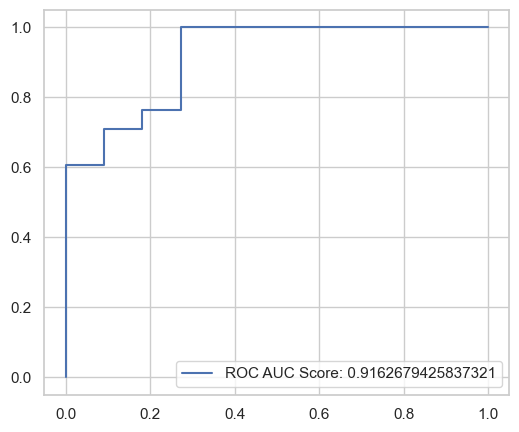

In [64]:
# ROC Curve
svm_linear_yprob = svm_linear.predict_proba(X_test)[:, 1]
svm1_fpr, svm1_tpr, svm1_threshold = roc_curve(Y_test, svm_linear_yprob)
svm_linear_auc_value = roc_auc_score(Y_test, svm_linear_yprob)

plt.figure(figsize=(6, 5))
plt.plot(svm1_fpr, svm1_tpr, label=f"ROC AUC Score: {svm_linear_auc_value}")
plt.legend(loc=4)
plt.show()

In [65]:
# Accuracy Scores for train and test data
svm1_X_train_pred = svm_linear.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, svm1_X_train_pred))
svm1_X_test_pred = svm_linear.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, svm1_X_test_pred))

Accuracy Score of trained data :  0.8561643835616438
Accuracy Score of test data :  0.9183673469387755


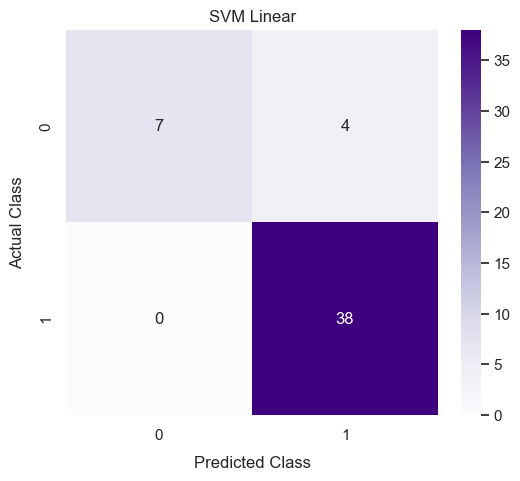

In [66]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
svm_linear_cm = confusion_matrix(Y_test, svm_linear_predictions)
sns.heatmap(svm_linear_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("SVM Linear")
plt.show()

In [67]:
displayMetrics(evaluateMetrics(svm_linear_cm), svm_linear_auc_value)

  Accuracy : 0.9183673469387755
 Precision : 0.9047619047619048
    Recall : 1.0
  F1-Score : 0.9500000000000001
 AUC Score : 0.9162679425837321


#### <li>Polynomial kernel</li>

In [69]:
svm_poly = SVC(kernel='poly', probability=True)
svm_poly.fit(X_train, Y_train)

SVC(kernel='poly', probability=True)

In [70]:
svm_poly_predictions = svm_poly.predict(X_test)
print(classification_report(Y_test, svm_poly_predictions))

              precision    recall  f1-score   support

           0       1.00      0.45      0.62        11
           1       0.86      1.00      0.93        38

    accuracy                           0.88        49
   macro avg       0.93      0.73      0.78        49
weighted avg       0.89      0.88      0.86        49



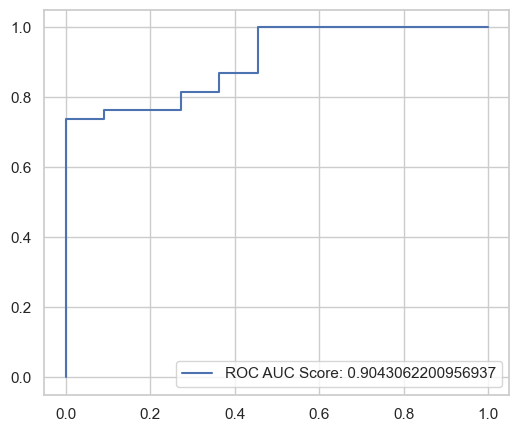

In [71]:
# ROC Curve
svm_poly_yprob = svm_poly.predict_proba(X_test)[:, 1]
svm2_fpr, svm2_tpr, svm2_threshold = roc_curve(Y_test, svm_poly_yprob)
svm_poly_auc_value = roc_auc_score(Y_test, svm_poly_yprob)

plt.figure(figsize=(6, 5))
plt.plot(svm2_fpr, svm2_tpr, label=f"ROC AUC Score: {svm_poly_auc_value}")
plt.legend(loc=4)
plt.show()

In [72]:
# Accuracy Scores for train and test data
svm2_X_train_pred = svm_poly.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, svm2_X_train_pred))
svm2_X_test_pred = svm_poly.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, svm2_X_test_pred))

Accuracy Score of trained data :  0.8493150684931506
Accuracy Score of test data :  0.8775510204081632


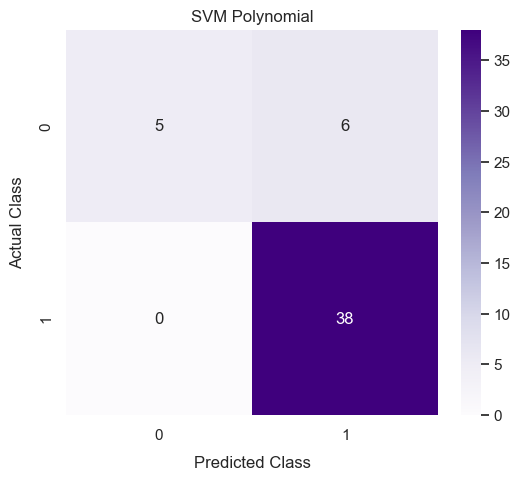

In [73]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
svm_poly_cm = confusion_matrix(Y_test, svm_poly_predictions)
sns.heatmap(svm_poly_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("SVM Polynomial")
plt.show()

In [74]:
displayMetrics(evaluateMetrics(svm_poly_cm), svm_poly_auc_value)

  Accuracy : 0.8775510204081632
 Precision : 0.8636363636363636
    Recall : 1.0
  F1-Score : 0.9268292682926829
 AUC Score : 0.9043062200956937


#### <li>Sigmoid kernel</li>

In [76]:
svm_sigmoid = SVC(kernel='sigmoid', probability=True)
svm_sigmoid.fit(X_train, Y_train)

SVC(kernel='sigmoid', probability=True)

In [77]:
svm_sigmoid_predictions = svm_sigmoid.predict(X_test)
print(classification_report(Y_test, svm_sigmoid_predictions))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.92      0.95      0.94        38

    accuracy                           0.90        49
   macro avg       0.86      0.84      0.85        49
weighted avg       0.90      0.90      0.90        49



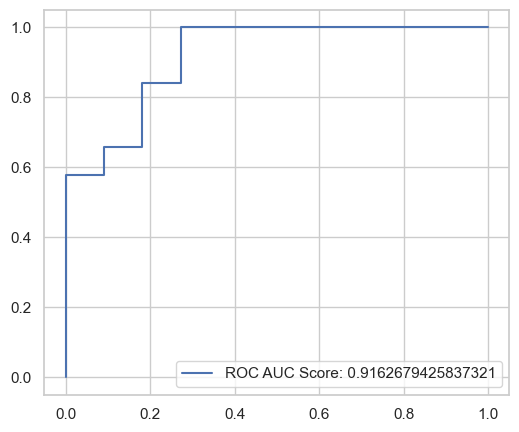

In [78]:
# ROC Curve
svm_sigmoid_yprob = svm_sigmoid.predict_proba(X_test)[:, 1]
svm3_fpr, svm3_tpr, svm3_threshold = roc_curve(Y_test, svm_sigmoid_yprob)
svm_sigmoid_auc_value = roc_auc_score(Y_test, svm_sigmoid_yprob)

plt.figure(figsize=(6, 5))
plt.plot(svm3_fpr, svm3_tpr, label=f"ROC AUC Score: {svm_sigmoid_auc_value}")
plt.legend(loc=4)
plt.show()

In [79]:
# Accuracy Scores for train and test data
svm3_X_train_pred = svm_sigmoid.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, svm3_X_train_pred))
svm3_X_test_pred = svm_sigmoid.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, svm3_X_test_pred))

Accuracy Score of trained data :  0.8561643835616438
Accuracy Score of test data :  0.8979591836734694


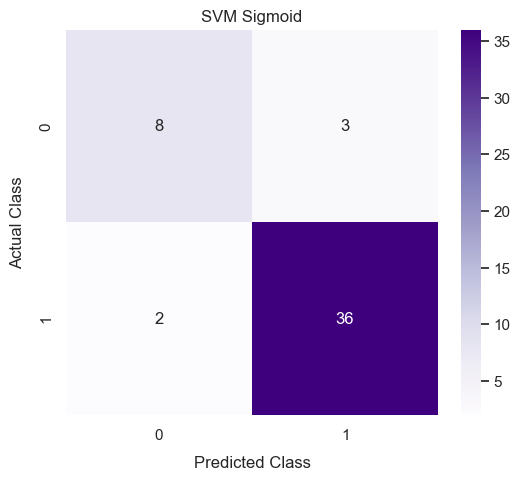

In [80]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
svm_sigmoid_cm = confusion_matrix(Y_test, svm_sigmoid_predictions)
sns.heatmap(svm_sigmoid_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("SVM Sigmoid")
plt.show()

In [81]:
displayMetrics(evaluateMetrics(svm_sigmoid_cm), svm_sigmoid_auc_value)

  Accuracy : 0.8979591836734694
 Precision : 0.9230769230769231
    Recall : 0.9473684210526315
  F1-Score : 0.935064935064935
 AUC Score : 0.9162679425837321


#### <li>RBF kernel</li>

In [83]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, Y_train)

SVC(probability=True)

In [84]:
svm_rbf_predictions = svm_rbf.predict(X_test)
print(classification_report(Y_test, svm_rbf_predictions))

              precision    recall  f1-score   support

           0       1.00      0.36      0.53        11
           1       0.84      1.00      0.92        38

    accuracy                           0.86        49
   macro avg       0.92      0.68      0.72        49
weighted avg       0.88      0.86      0.83        49



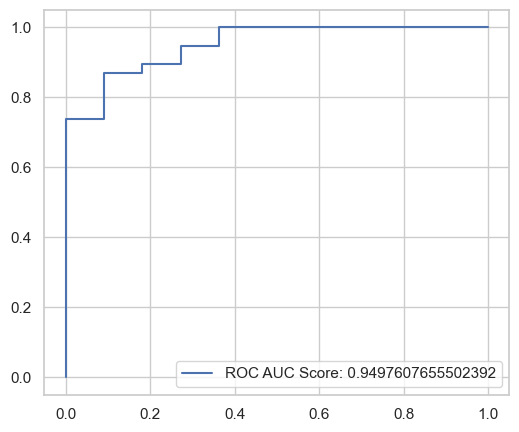

In [85]:
# ROC Curve
svm_rbf_yprob = svm_rbf.predict_proba(X_test)[:, 1]
svm4_fpr, svm4_tpr, svm4_threshold = roc_curve(Y_test, svm_rbf_yprob)
svm_rbf_auc_value = roc_auc_score(Y_test, svm_rbf_yprob)

plt.figure(figsize=(6, 5))
plt.plot(svm4_fpr, svm4_tpr, label=f"ROC AUC Score: {svm_rbf_auc_value}")
plt.legend(loc=4)
plt.show()

In [86]:
# Accuracy Scores for train and test data
svm4_X_train_pred = svm_rbf.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, svm4_X_train_pred))
svm4_X_test_pred = svm_rbf.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, svm4_X_test_pred))

Accuracy Score of trained data :  0.863013698630137
Accuracy Score of test data :  0.8571428571428571


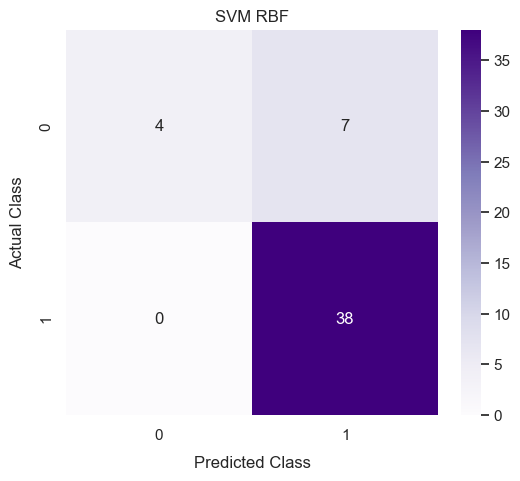

In [87]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
svm_rbf_cm = confusion_matrix(Y_test, svm_rbf_predictions)
sns.heatmap(svm_rbf_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("SVM RBF")
plt.show()

In [88]:
displayMetrics(evaluateMetrics(svm_rbf_cm), svm_rbf_auc_value)

  Accuracy : 0.8571428571428571
 Precision : 0.8444444444444444
    Recall : 1.0
  F1-Score : 0.9156626506024096
 AUC Score : 0.9497607655502392


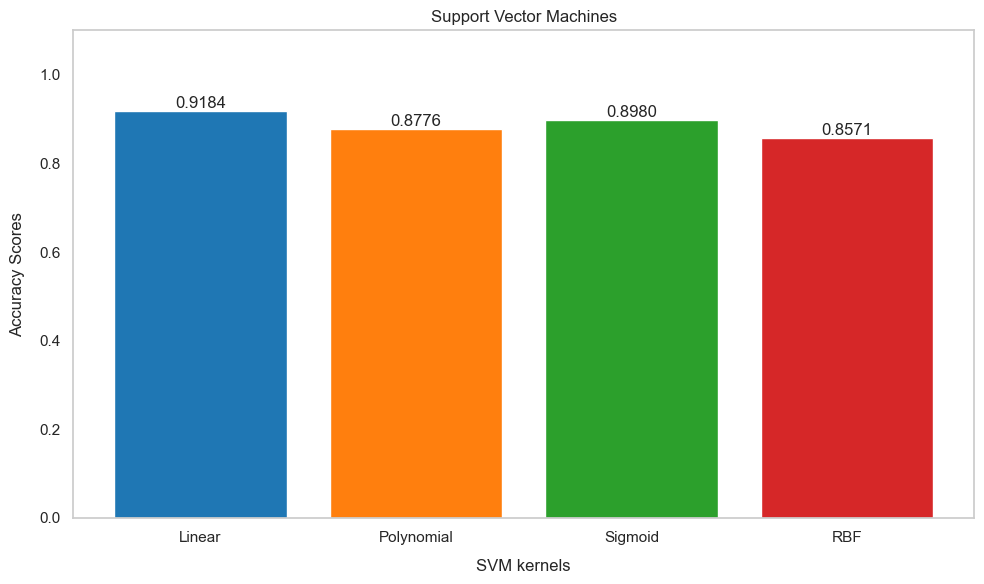

In [89]:
# Comparing all SVM Models
# Bar Plot of Accuracies

svm1 = evaluateMetrics(svm_linear_cm)
svm1.append(svm_linear_auc_value)
svm2 = evaluateMetrics(svm_poly_cm)
svm2.append(svm_poly_auc_value)
svm3 = evaluateMetrics(svm_sigmoid_cm)
svm3.append(svm_sigmoid_auc_value)
svm4 = evaluateMetrics(svm_rbf_cm)
svm4.append(svm_rbf_auc_value)

svm_kernels = ["Linear", "Polynomial", "Sigmoid", "RBF"]
svm_accuracies = [svm1[0], svm2[0], svm3[0], svm4[0]]
# print(svm_accuracies)

colors = [
    (31/255, 119/255, 180/255),    # Vibrant Blue
    (255/255, 127/255, 14/255),    # Bright Orange
    (44/255, 160/255, 44/255),     # Bright Green
    (214/255, 39/255, 40/255)      # Purplish Red
]

plt.figure(figsize=(10, 6))
svm_graph = plt.bar(svm_kernels, svm_accuracies, color=colors)
plt.xlabel("SVM kernels", labelpad=10)
plt.ylabel("Accuracy Scores", labelpad=10)
plt.title("Support Vector Machines")
plt.ylim(0, 1.10)
plt.xticks()


for i in range(4):
    plt.text(x=i, y=svm_accuracies[i], s=f"{svm_accuracies[i]:.4f}", ha="center", va="bottom")

plt.tight_layout()
plt.grid(False)
plt.show()

In [90]:
# Table between metrics of all kernels

svm1_metrics = {metrics[i]: svm1[i] for i in range(len(metrics))}
svm2_metrics = {metrics[i]: svm2[i] for i in range(len(metrics))}
svm3_metrics = {metrics[i]: svm3[i] for i in range(len(metrics))}
svm4_metrics = {metrics[i]: svm4[i] for i in range(len(metrics))}

svm_table = pd.DataFrame({
    'Linear ': svm1_metrics, 'Polynomial': svm2_metrics, 
    'Sigmoid ': svm3_metrics, 'RBF': svm4_metrics
})
print(svm_table)

            Linear   Polynomial  Sigmoid        RBF
Accuracy   0.918367    0.877551  0.897959  0.857143
Precision  0.904762    0.863636  0.923077  0.844444
Recall     1.000000    1.000000  0.947368  1.000000
F1-Score   0.950000    0.926829  0.935065  0.915663
AUC Score  0.916268    0.904306  0.916268  0.949761


### 4. <u>K-Nearest Neighbors (KNN)</u>

#####  Usually for Binary classification dataset, n_neighbors should be 2 no matter what.

In [93]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [94]:
knn_predictions = knn_model.predict(X_test)
print(classification_report(Y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.97      0.95      0.96        38

    accuracy                           0.94        49
   macro avg       0.90      0.93      0.91        49
weighted avg       0.94      0.94      0.94        49



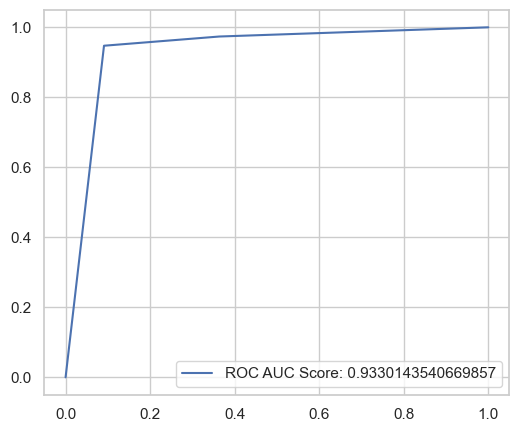

In [95]:
# ROC Curve
knn_yprob = knn_model.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, knn_threshold = roc_curve(Y_test, knn_yprob)
knn_auc_value = roc_auc_score(Y_test, knn_yprob)

plt.figure(figsize=(6, 5))
plt.plot(knn_fpr, knn_tpr, label=f"ROC AUC Score: {knn_auc_value}")
plt.legend(loc=4)
plt.show()

In [96]:
# Accuracy Scores for train and test data
knn_X_train_pred = knn_model.predict(X_train)
print("Accuracy Score of trained data : ", accuracy_score(Y_train, knn_X_train_pred))
knn_X_test_pred = knn_model.predict(X_test)
print("Accuracy Score of test data : ", accuracy_score(Y_test, knn_X_test_pred))

Accuracy Score of trained data :  0.952054794520548
Accuracy Score of test data :  0.9387755102040817


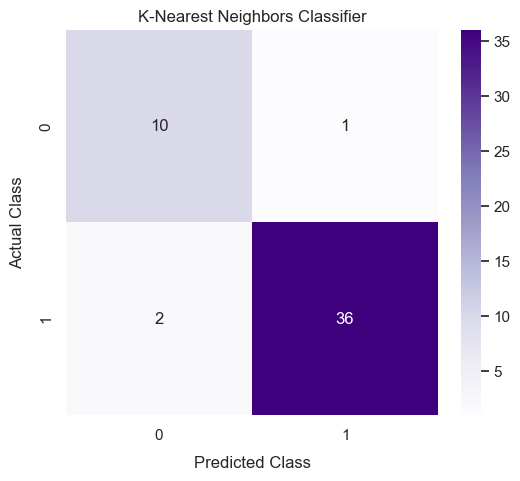

In [97]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
knn_cm = confusion_matrix(Y_test, knn_predictions)
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("K-Nearest Neighbors Classifier")
plt.show()

In [98]:
displayMetrics(evaluateMetrics(knn_cm), knn_auc_value)

  Accuracy : 0.9387755102040817
 Precision : 0.972972972972973
    Recall : 0.9473684210526315
  F1-Score : 0.9599999999999999
 AUC Score : 0.9330143540669857


### 5. <u>Naive-Bayes Classifier</u>

#### <li>Gaussian Naive-Bayes Classifier using GridSearchCV</li>

In [101]:
gnb = GaussianNB()
gnb_params = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03]}
grid_search = GridSearchCV(estimator=gnb, cv=3, param_grid=gnb_params, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print("The best var_smoothing value :", grid_search.best_params_)

# Choose the best Gaussian Naive-Bayes Estimator
gnb_model = grid_search.best_estimator_

The best var_smoothing value : {'var_smoothing': 1e-09}


In [102]:
gnb_predictions = gnb_model.predict(X_test)
print(classification_report(Y_test, gnb_predictions))

              precision    recall  f1-score   support

           0       0.75      0.55      0.63        11
           1       0.88      0.95      0.91        38

    accuracy                           0.86        49
   macro avg       0.81      0.75      0.77        49
weighted avg       0.85      0.86      0.85        49



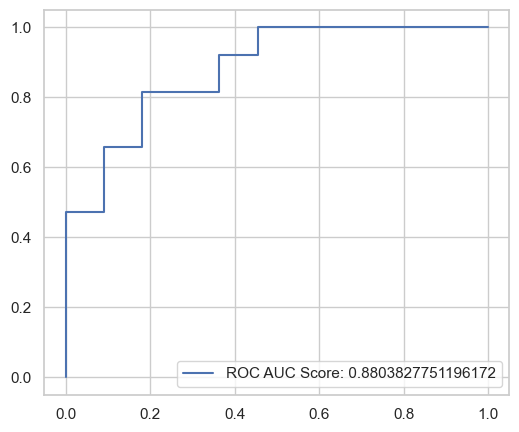

In [103]:
# ROC Curve
gnb_yprob = gnb_model.predict_proba(X_test)[:, 1]
gnb_fpr, gnb_tpr, gnb_threshold = roc_curve(Y_test, gnb_yprob)
gnb_auc_value = roc_auc_score(Y_test, gnb_yprob)

plt.figure(figsize=(6, 5))
plt.plot(gnb_fpr, gnb_tpr, label=f"ROC AUC Score: {gnb_auc_value}")
plt.legend(loc=4)
plt.show()

In [104]:
# Accuracy Scores for train and test data
gnb_X_train_pred = gnb_model.predict(X_train)
print("Accuracy Score of trained data : ", accuracy_score(Y_train, gnb_X_train_pred))
gnb_X_test_pred = gnb_model.predict(X_test)
print("Accuracy Score of test data : ", accuracy_score(Y_test, gnb_X_test_pred))

Accuracy Score of trained data :  0.7808219178082192
Accuracy Score of test data :  0.8571428571428571


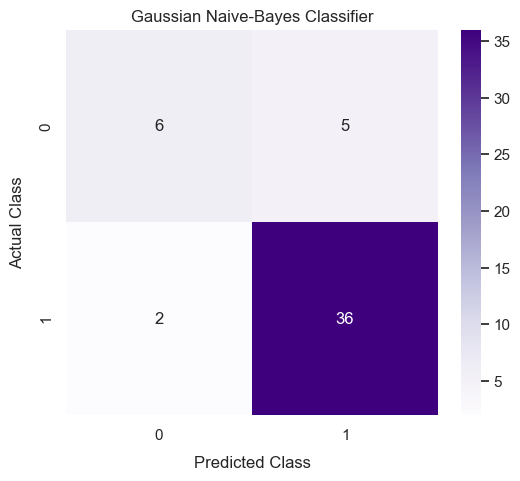

In [105]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
gnb_cm = confusion_matrix(Y_test, gnb_predictions)
sns.heatmap(gnb_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("Gaussian Naive-Bayes Classifier")
plt.show()

In [106]:
displayMetrics(evaluateMetrics(gnb_cm), gnb_auc_value)

  Accuracy : 0.8571428571428571
 Precision : 0.8780487804878049
    Recall : 0.9473684210526315
  F1-Score : 0.9113924050632912
 AUC Score : 0.8803827751196172


#### <li>Multinomial Naive-Bayes Classifier using GridSearchCV</li>

In [108]:
minmax = MinMaxScaler()
X_train1 = minmax.fit_transform(X_train)
X_test1 = minmax.fit_transform(X_test)

In [109]:
mnb = MultinomialNB()
mnb_params = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
grid_search = GridSearchCV(estimator=mnb, cv=3, param_grid=mnb_params, scoring='accuracy')
grid_search.fit(X_train1, Y_train)
print("The best alpha value :", grid_search.best_params_)

# Choose the best Multinimial Naive-Bayes Estimator
mnb_model = grid_search.best_estimator_

The best alpha value : {'alpha': 0.1}


In [110]:
mnb_predictions = mnb_model.predict(X_test1)
print(classification_report(Y_test, mnb_predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.78      1.00      0.87        38

    accuracy                           0.78        49
   macro avg       0.39      0.50      0.44        49
weighted avg       0.60      0.78      0.68        49



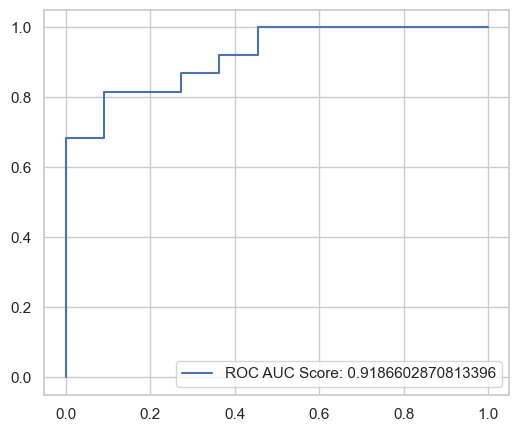

In [111]:
# ROC Curve
mnb_yprob = mnb_model.predict_proba(X_test1)[:, 1]
mnb_fpr, mnb_tpr, mnb_threshold = roc_curve(Y_test, mnb_yprob)
mnb_auc_value = roc_auc_score(Y_test, mnb_yprob)

plt.figure(figsize=(6, 5))
plt.plot(mnb_fpr, mnb_tpr, label=f"ROC AUC Score: {mnb_auc_value}")
plt.legend(loc=4)
plt.show()

In [112]:
# Accuracy Scores for train and test data
mnb_X_train_pred = mnb_model.predict(X_train1)
print("Accuracy Score of trained data : ", accuracy_score(Y_train, mnb_X_train_pred))
mnb_X_test_pred = mnb_model.predict(X_test1)
print("Accuracy Score of test data : ", accuracy_score(Y_test, mnb_X_test_pred))

Accuracy Score of trained data :  0.7465753424657534
Accuracy Score of test data :  0.7755102040816326


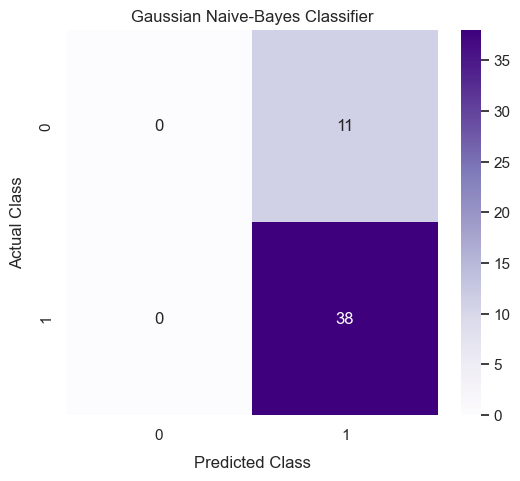

In [113]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
mnb_cm = confusion_matrix(Y_test, mnb_predictions)
sns.heatmap(mnb_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("Gaussian Naive-Bayes Classifier")
plt.show()

In [114]:
displayMetrics(evaluateMetrics(mnb_cm), mnb_auc_value)

  Accuracy : 0.7755102040816326
 Precision : 0.7755102040816326
    Recall : 1.0
  F1-Score : 0.8735632183908045
 AUC Score : 0.9186602870813396


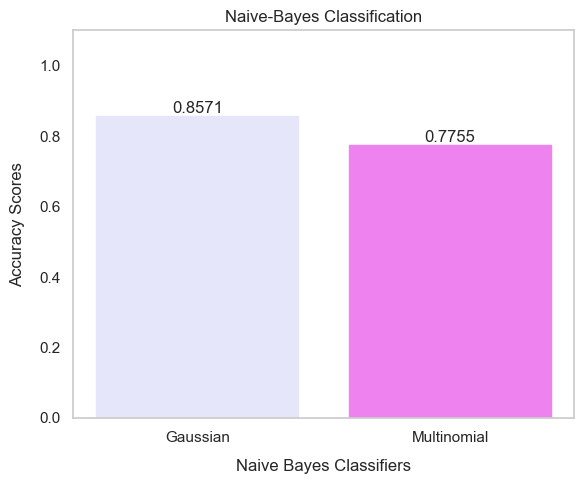

In [115]:
# Comparing both Naive-Bayes Models
# Bar Plot of Accuracies

nb_models = ["Gaussian", "Multinomial"]
gnb_metrics = list(evaluateMetrics(gnb_cm))
gnb_metrics.append(gnb_auc_value)
mnb_metrics = list(evaluateMetrics(mnb_cm))
mnb_metrics.append(mnb_auc_value)
nb_accuracies = [gnb_metrics[0], mnb_metrics[0]]
# print(nb_accuracies)

plt.figure(figsize=(6, 5))
nb_graph = plt.bar(nb_models, nb_accuracies)
plt.xlabel("Naive Bayes Classifiers", labelpad=10)
plt.ylabel("Accuracy Scores", labelpad=10)
plt.title("Naive-Bayes Classification")
plt.ylim(0, 1.10)
plt.xticks()

for i in range(2):
    plt.text(x=i, y=nb_accuracies[i], s=f"{nb_accuracies[i]:.4f}", ha="center", va="bottom")

nb_graph[0].set_color('lavender')
nb_graph[1].set_color('violet')
plt.tight_layout()
plt.grid(False)
plt.show()

In [116]:
# Table between metrics of both models

gnb_metrics_dict = {metrics[i]: gnb_metrics[i] for i in range(len(metrics))}
mnb_metrics_dict = {metrics[i]: mnb_metrics[i] for i in range(len(metrics))}
nb_table = pd.DataFrame({
    'Gaussian' : gnb_metrics_dict,
    'Multinomial' : mnb_metrics_dict
})
print(nb_table)

           Gaussian  Multinomial
Accuracy   0.857143     0.775510
Precision  0.878049     0.775510
Recall     0.947368     1.000000
F1-Score   0.911392     0.873563
AUC Score  0.880383     0.918660


In [117]:
colors = [
    (31/255, 119/255, 180/255),    # Vibrant Blue
    (255/255, 127/255, 14/255),    # Bright Orange
    (44/255, 160/255, 44/255),     # Fresh Green
    (214/255, 39/255, 40/255),     # Purplish Red
    (188/255, 189/255, 34/255)     # Golden Yellow
]

### Barplot of Models with their Accuracies.

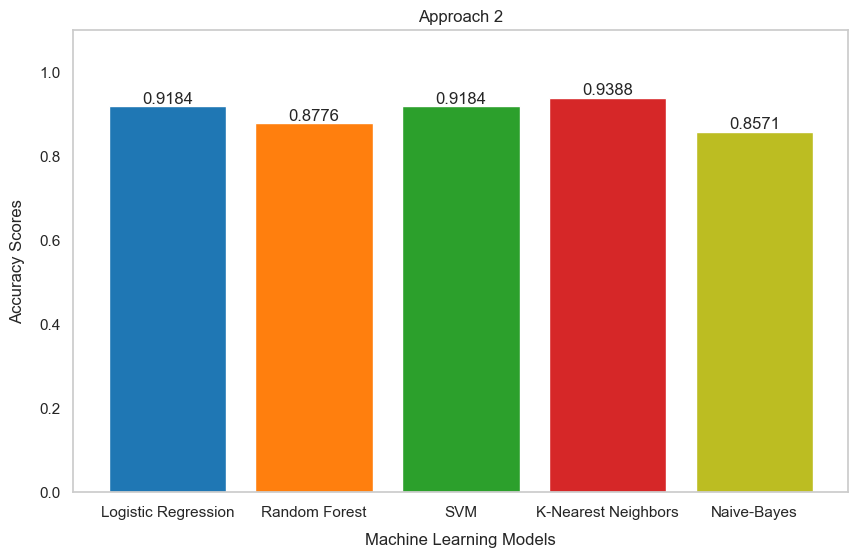

In [119]:
plt.figure(figsize=(10, 6))

models = ['Logistic Regression', 'Random Forest', 'SVM', 'K-Nearest Neighbors', 'Naive-Bayes']
accuracies = [
    l2[0], evaluateMetrics(rfc_cm)[0], 
    svm1[0], evaluateMetrics(knn_cm)[0], 
    gnb_metrics[0]
]

plt.bar(models, accuracies, color=colors)
plt.title("Approach 2")
plt.xlabel("Machine Learning Models", labelpad=10)
plt.ylabel("Accuracy Scores", labelpad=10)
plt.ylim(0, 1.10)
plt.xticks()


for i in range(5):
    plt.text(x=i, y=accuracies[i], s=f"{accuracies[i]:.4f}", ha="center", va="bottom")

plt.grid(False)
plt.show()